In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [85]:
df = pd.read_csv("/content/UberDataset.csv")

In [86]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [87]:
df.shape

(1156, 7)

In [88]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [90]:
df["CATEGORY"].unique()

array(['Business', 'Personal', nan], dtype=object)

In [91]:
df["PURPOSE"].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [92]:
df["PURPOSE"] = df["PURPOSE"].fillna("Missing")

In [93]:
df.isnull().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,0


In [94]:
df.dropna(inplace=True)

In [95]:
df.isnull().sum()

,0
START_DATE,0
END_DATE,0
CATEGORY,0
START,0
STOP,0
MILES,0
PURPOSE,0


In [96]:
df.drop_duplicates(inplace = True)

In [97]:
df.duplicated().sum()

0

In [98]:
df.dtypes

,0
START_DATE,object
END_DATE,object
CATEGORY,object
START,object
STOP,object
MILES,float64
PURPOSE,object


In [99]:
import seaborn as sns

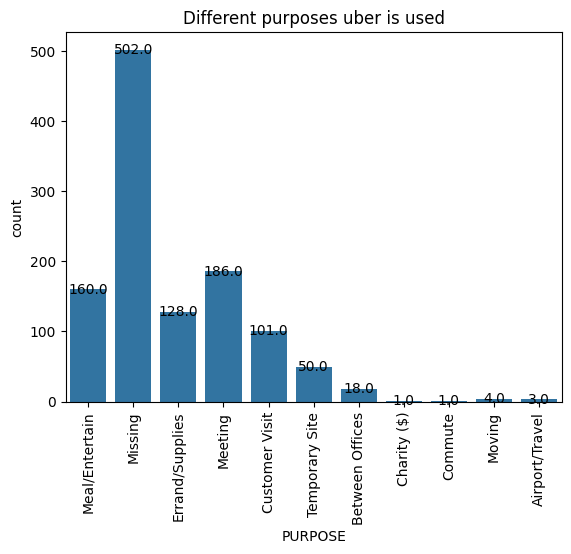

In [100]:
a = sns.countplot(data=df,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
    plt.xticks(rotation = 90)
plt.title("Different purposes uber is used")
plt.show()


From the above result, Uber is mostly used for Meetings, Customer Visit, Meal/Entertain.

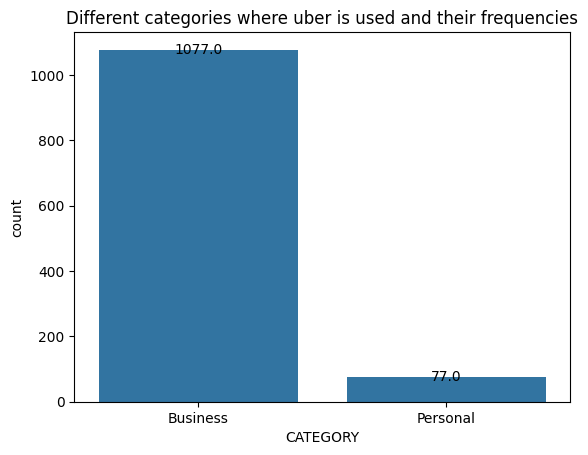

In [101]:
a = sns.countplot(data=df,x="CATEGORY")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.title("Different categories where uber is used and their frequencies")
plt.show()


Uber is used mostly for Business purposes

<ipython-input-102-0e8db57232ea>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Starts', y='Location', data=start_location_counts.head(10), palette='viridis')
<ipython-input-102-0e8db57232ea>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Stops', y='Location', data=stop_location_counts.head(10), palette='magma')


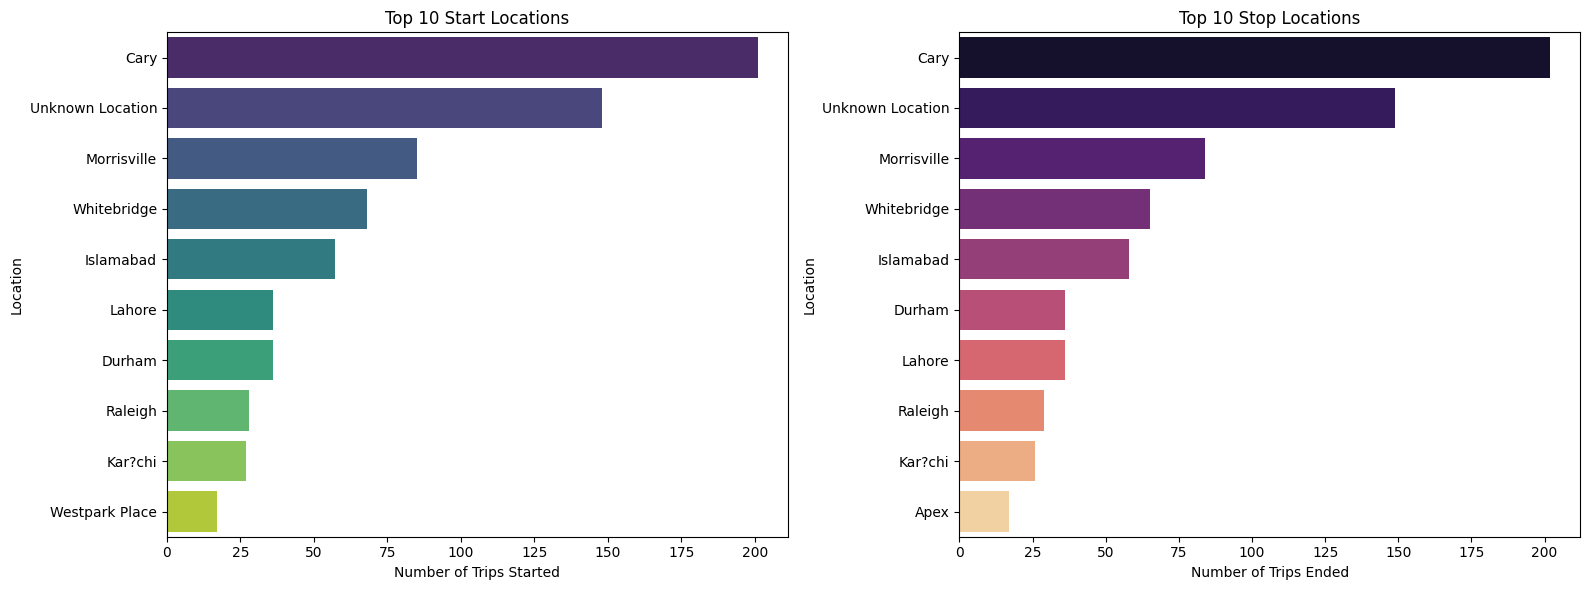

In [102]:
# First, we find the busiest start and stop locations
busiest_start_location = df['START'].value_counts().idxmax()
busiest_stop_location = df['STOP'].value_counts().idxmax()

# Now let's visualize the number of trips starting from the busiest location
# and the number of trips ending at the busiest stop location

# Count the number of trips for each start location
start_location_counts = df['START'].value_counts().reset_index()
start_location_counts.columns = ['Location', 'Number of Starts']

# Count the number of trips for each stop location
stop_location_counts = df['STOP'].value_counts().reset_index()
stop_location_counts.columns = ['Location', 'Number of Stops']

# Plotting
plt.figure(figsize=(16, 6))

# Plot for start locations
plt.subplot(1, 2, 1)
sns.barplot(x='Number of Starts', y='Location', data=start_location_counts.head(10), palette='viridis')
plt.title('Top 10 Start Locations')
plt.xlabel('Number of Trips Started')
plt.ylabel('Location')

# Plot for stop locations
plt.subplot(1, 2, 2)
sns.barplot(x='Number of Stops', y='Location', data=stop_location_counts.head(10), palette='magma')
plt.title('Top 10 Stop Locations')
plt.xlabel('Number of Trips Ended')
plt.ylabel('Location')

# Show the plot
plt.tight_layout()
plt.show()

In [103]:
from dateutil.parser import parse

df["START_DATE"] = df["START_DATE"].apply(lambda x: parse(x))
df["END_DATE"] = df["END_DATE"].apply(lambda x: parse(x))


In [104]:
df["day"] = df["START_DATE"].dt.strftime("%A")


In [105]:
df["day"]

,day
0,Friday
1,Saturday
2,Saturday
3,Tuesday
4,Wednesday
...,...
1150,Saturday
1151,Saturday
1152,Saturday
1153,Saturday


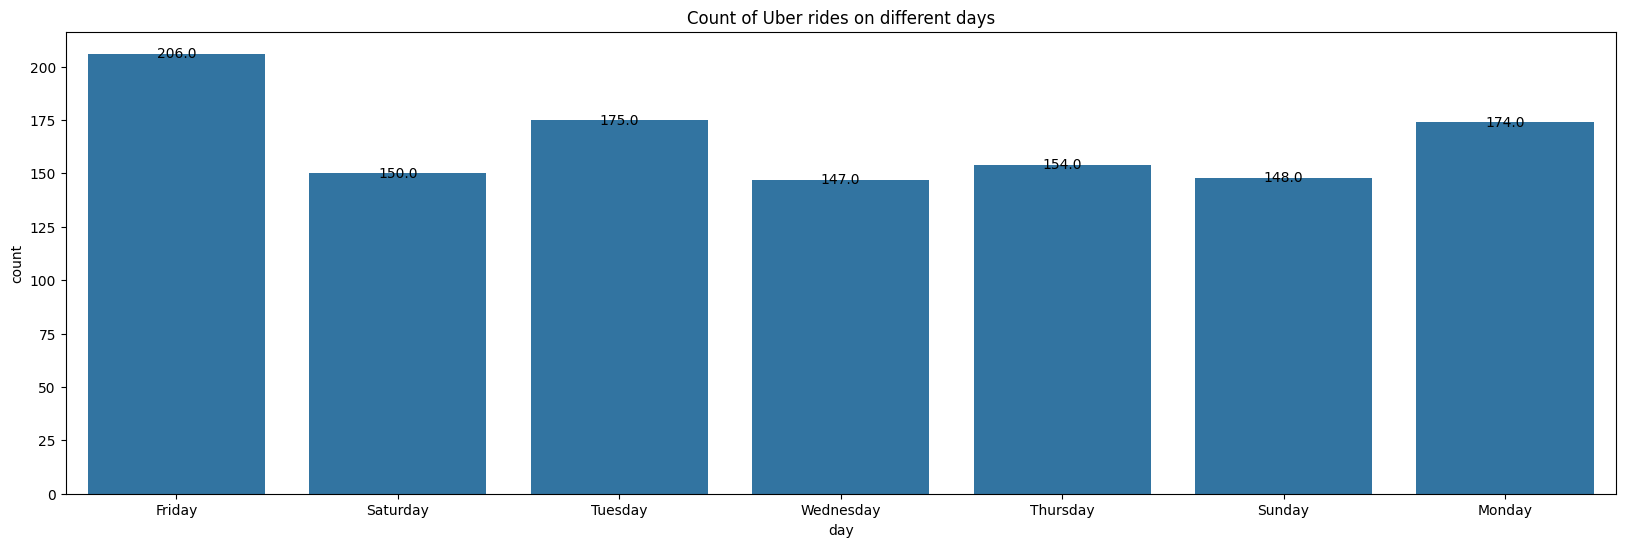

In [106]:
plt.figure(figsize=(20,6))

a = sns.countplot(data=df,x="day")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.title("Count of Uber rides on different days")
plt.show()

In [107]:
df["MILES"]=df["MILES"].astype(int)

In [108]:
import numpy as np

In [109]:
df["MILES"] = np.abs(df["MILES"])

In [110]:
df["MILES"]

,MILES
0,5
1,5
2,4
3,4
4,63
...,...
1150,0
1151,3
1152,16
1153,6


In [111]:
df.dtypes

,0
START_DATE,datetime64[ns]
END_DATE,datetime64[ns]
CATEGORY,object
START,object
STOP,object
MILES,int64
PURPOSE,object
day,object


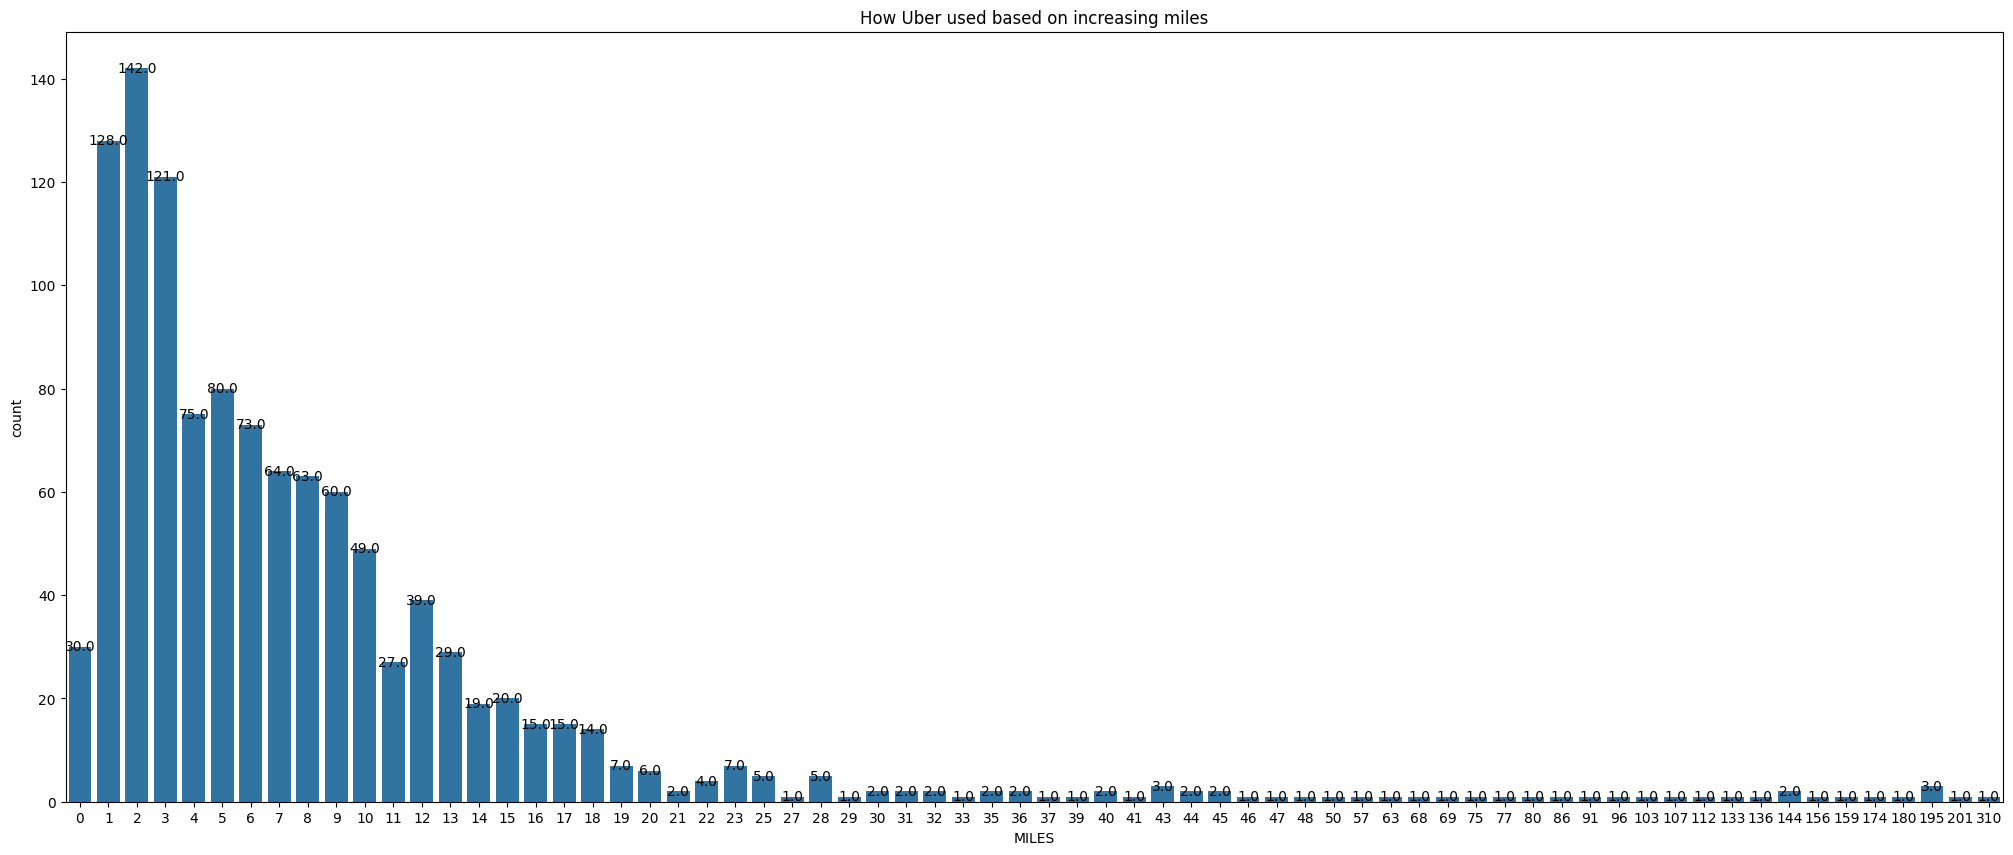

In [112]:
plt.figure(figsize=(25,10))
a = sns.countplot(data=df,x="MILES")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.title("How Uber used based on increasing miles")
plt.show()

People prefer Uber for shorther miles than longer miles.

In [113]:
np.mean(df["MILES"])

10.118717504332755

In [114]:
df["MILES"].skew()

7.217800257847416

In [115]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%m-%d-%Y %H:%M', errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='%m-%d-%Y %H:%M', errors='coerce')

In [116]:
df['Request Hour'] = df['START_DATE'].dt.hour

In [117]:
# Create new column Time Slot which helps during the analysis

TIME_SLOTS = {
    0: 'Late Night',
    1: 'Midnight',
    2: 'Midnight',
    3: 'Early Morning',
    4: 'Early Morning',
    5: 'Early Morning',
    6: 'Morning',
    7: 'Morning',
    8: 'Morning',
    9: 'Morning',
    10: 'Morning',
    11: 'Morning',
    12: 'After Noon',
    13: 'After Noon',
    14: 'After Noon',
    15: 'After Noon',
    16: 'Evening',
    17: 'Evening',
    18: 'Evening',
    19: 'Night',
    20: 'Night',
    21: 'Night',
    22: 'Late Night',
    23: 'Late Night',
}

df['Time Slot'] = df['Request Hour'].apply(lambda x: TIME_SLOTS.get(x))

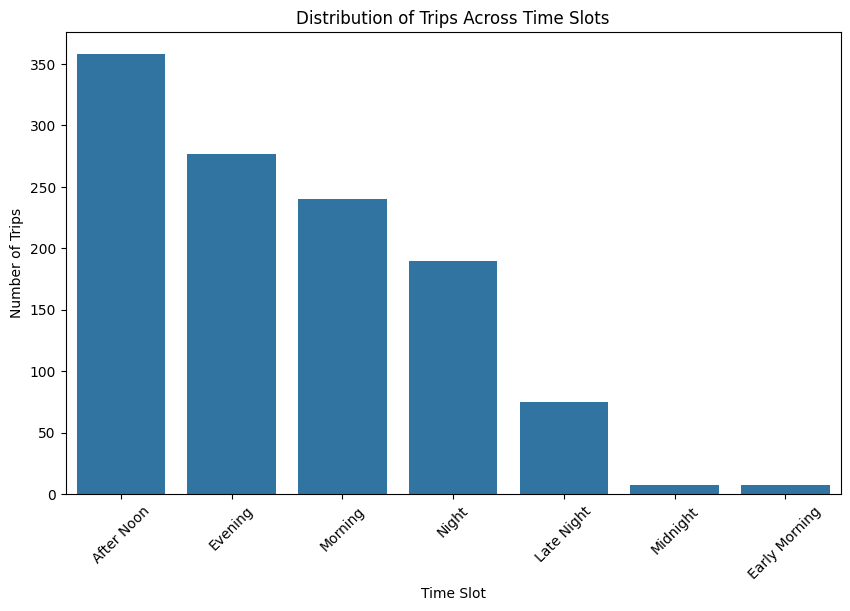

In [118]:
time_slot_counts = df['Time Slot'].value_counts()

# Visualization: Distribution of Trips in Different Time Slots
plt.figure(figsize=(10, 6))
sns.barplot(x=time_slot_counts.index, y=time_slot_counts.values)
plt.title('Distribution of Trips Across Time Slots')
plt.xlabel('Time Slot')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

In [120]:
df['day_name'] = df['START_DATE'].dt.day_name()
df["month"] = df['START_DATE'].dt.month_name()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

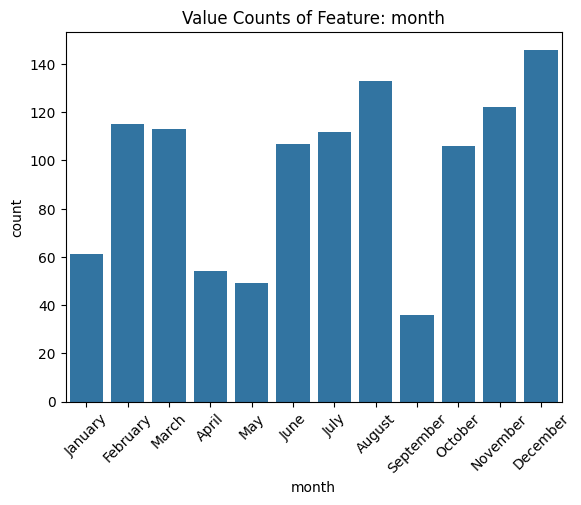

In [121]:
sns.countplot(x=df["month"])
plt.title("Value Counts of Feature: month")
plt.xticks(rotation=45)

# **Analyzing the data For Business Usecase**

In [122]:
result = df.loc[df["CATEGORY"]=="Business"]

In [123]:
result.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day,Request Hour,Time Slot,day_name,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5,Meal/Entertain,Friday,21,Night,Friday,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5,Missing,Saturday,1,Midnight,Saturday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4,Errand/Supplies,Saturday,20,Night,Saturday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4,Meeting,Tuesday,17,Evening,Tuesday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63,Customer Visit,Wednesday,14,After Noon,Wednesday,January


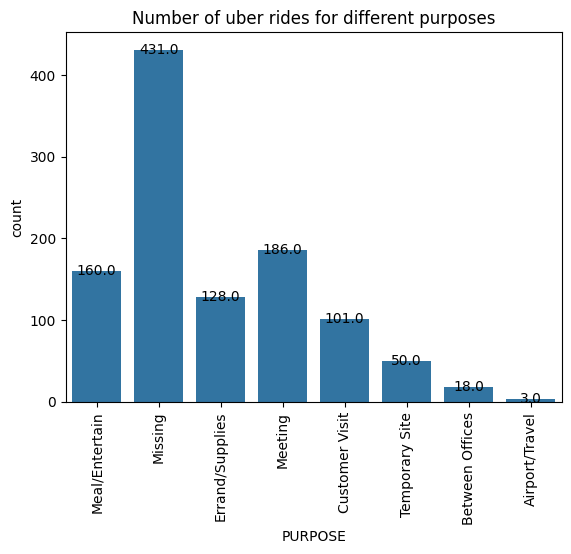

In [124]:
a = sns.countplot(data=result,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
    plt.xticks(rotation = 90)
plt.title("Number of uber rides for different purposes")
plt.show()

For Business purposes Uber is mainly used for Meetings, Customer Visits and Meals/Entertainments And Errand/Supplies

Text(0.5, 1.0, 'Number of miles people travel using Uber for different purposes ')

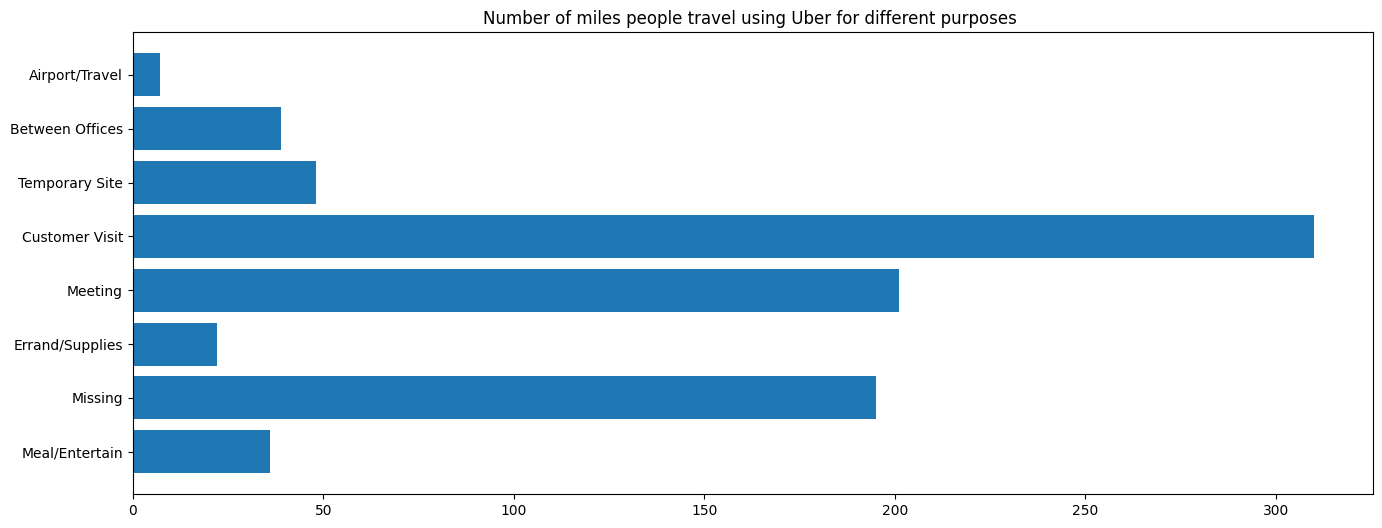

In [125]:
plt.figure(figsize=(16,6))
plt.barh(result["PURPOSE"],result["MILES"])
plt.title("Number of miles people travel using Uber for different purposes ")

Uber is mostly used for Customer visits and Meetings

In [126]:
result2 = df.loc[df["PURPOSE"]=="Customer Visit"]

# **Customer Visit**

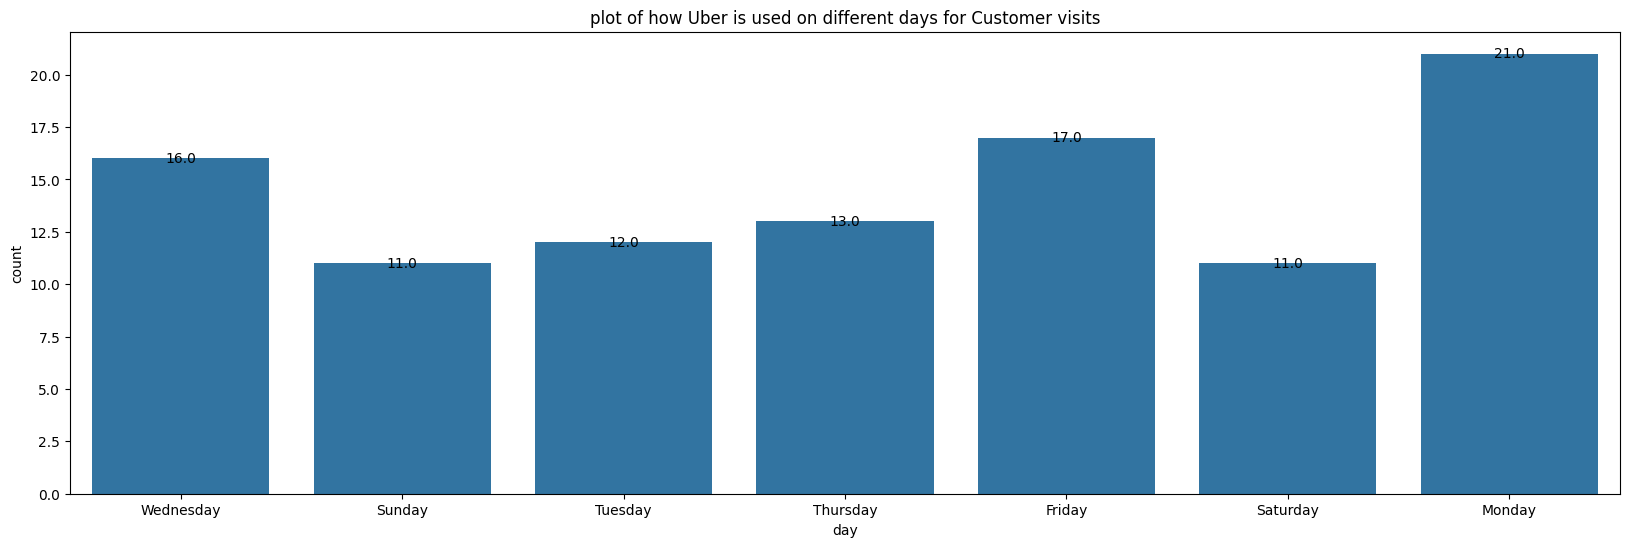

In [127]:
plt.figure(figsize=(20,6))

a = sns.countplot(data=result2,x="day")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.title("plot of how Uber is used on different days for Customer visits")
plt.show()

Text(0.5, 1.0, 'Miles people travel using Uber on different days for customer visits')

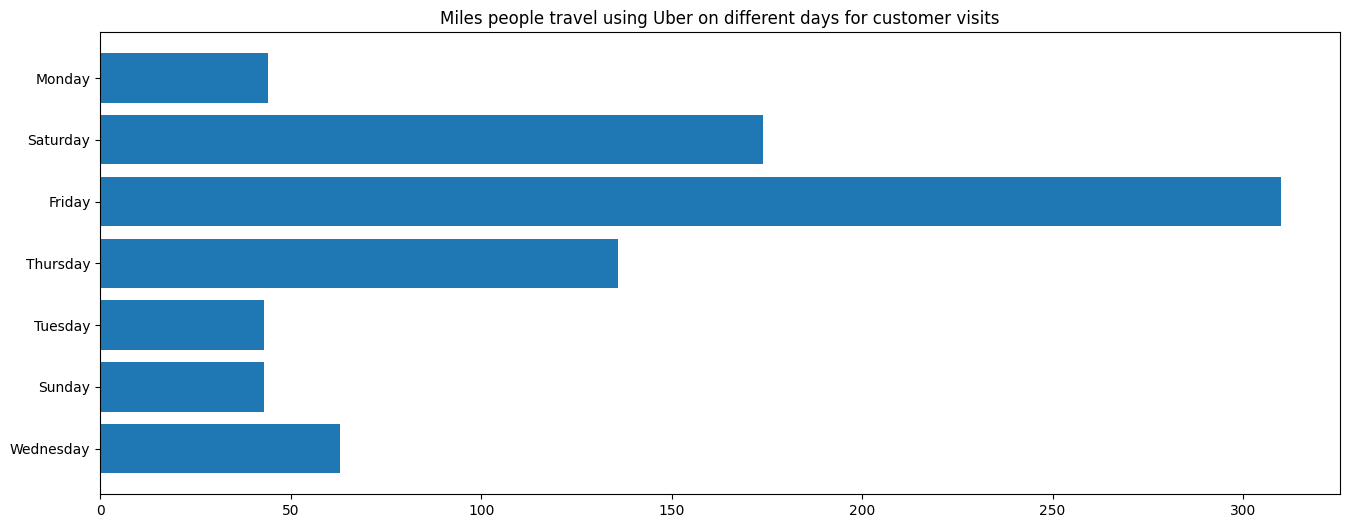

In [128]:
plt.figure(figsize=(16,6))
plt.barh(result2["day"],result2["MILES"])
plt.title("Miles people travel using Uber on different days for customer visits")

In [129]:
results1 = result2.loc[result2["day"]=="Friday"]
results2 = result2.loc[result2["day"]=="Saturday"]
results3 = result2.loc[result2["day"]=="Sunday"]

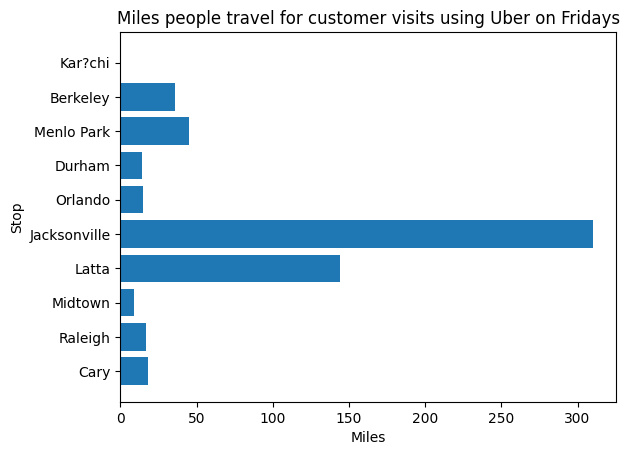

In [130]:
plt.xlabel("Miles")
plt.ylabel("Stop")
plt.barh(results1["STOP"],results1["MILES"])
plt.title("Miles people travel for customer visits using Uber on Fridays")
plt.show()

In [131]:
results1

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day,Request Hour,Time Slot,day_name,month
53,2016-01-29 09:31:00,2016-01-29 09:45:00,Business,Cary,Cary,4,Customer Visit,Friday,9,Morning,Friday,January
97,2016-02-12 11:14:00,2016-02-12 11:35:00,Business,Morrisville,Raleigh,17,Customer Visit,Friday,11,Morning,Friday,February
100,2016-02-12 15:33:00,2016-02-12 16:06:00,Business,Morrisville,Cary,11,Customer Visit,Friday,15,After Noon,Friday,February
184,2016-03-04 09:46:00,2016-03-04 10:03:00,Business,Durham,Cary,9,Customer Visit,Friday,9,Morning,Friday,March
187,2016-03-04 13:40:00,2016-03-04 14:09:00,Business,Cary,Raleigh,15,Customer Visit,Friday,13,After Noon,Friday,March
242,2016-03-18 21:01:00,2016-03-18 21:15:00,Business,Sharpstown,Midtown,9,Customer Visit,Friday,21,Night,Friday,March
268,2016-03-25 13:24:00,2016-03-25 16:22:00,Business,Cary,Latta,144,Customer Visit,Friday,13,After Noon,Friday,March
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310,Customer Visit,Friday,16,Evening,Friday,March
290,2016-04-01 14:36:00,2016-04-01 15:24:00,Business,Kissimmee,Orlando,15,Customer Visit,Friday,14,After Noon,Friday,April
339,2016-04-29 18:46:00,2016-04-29 19:18:00,Business,Cary,Durham,14,Customer Visit,Friday,18,Evening,Friday,April


Uber is used on Fridays for large distances.

# **On Saturdays**

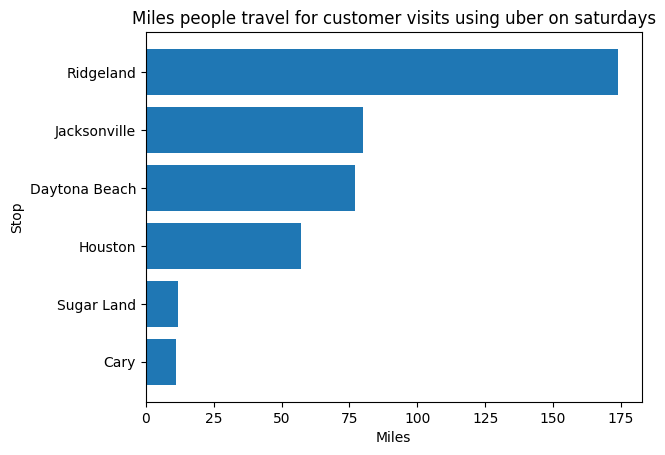

In [132]:
plt.xlabel("Miles")
plt.ylabel("Stop")
plt.barh(results2["STOP"],results2["MILES"])
plt.title("Miles people travel for customer visits using uber on saturdays")
plt.show()

In [133]:
results2

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day,Request Hour,Time Slot,day_name,month
60,2016-01-30 18:09:00,2016-01-30 18:24:00,Business,Apex,Cary,5,Customer Visit,Saturday,18,Evening,Saturday,January
244,2016-03-19 12:50:00,2016-03-19 13:13:00,Business,Houston,Sugar Land,12,Customer Visit,Saturday,12,After Noon,Saturday,March
245,2016-03-19 14:01:00,2016-03-19 14:57:00,Business,Sugar Land,Houston,35,Customer Visit,Saturday,14,After Noon,Saturday,March
251,2016-03-19 19:33:00,2016-03-19 20:39:00,Business,Galveston,Houston,57,Customer Visit,Saturday,19,Night,Saturday,March
295,2016-04-02 12:21:00,2016-04-02 14:47:00,Business,Kissimmee,Daytona Beach,77,Customer Visit,Saturday,12,After Noon,Saturday,April
296,2016-04-02 16:57:00,2016-04-02 18:09:00,Business,Daytona Beach,Jacksonville,80,Customer Visit,Saturday,16,Evening,Saturday,April
297,2016-04-02 19:38:00,2016-04-02 22:36:00,Business,Jacksonville,Ridgeland,174,Customer Visit,Saturday,19,Night,Saturday,April
388,2016-05-28 14:35:00,2016-05-28 15:04:00,Business,Morrisville,Cary,11,Customer Visit,Saturday,14,After Noon,Saturday,May
978,2016-11-19 21:14:00,2016-11-19 21:35:00,Business,Apex,Cary,5,Customer Visit,Saturday,21,Night,Saturday,November
1019,2016-12-03 20:31:00,2016-12-03 20:41:00,Business,Morrisville,Cary,3,Customer Visit,Saturday,20,Night,Saturday,December


Rigeland and Jacksonvile and Daytona Beach have longest distances out of all.

# **On Sundays For Customer Visit**

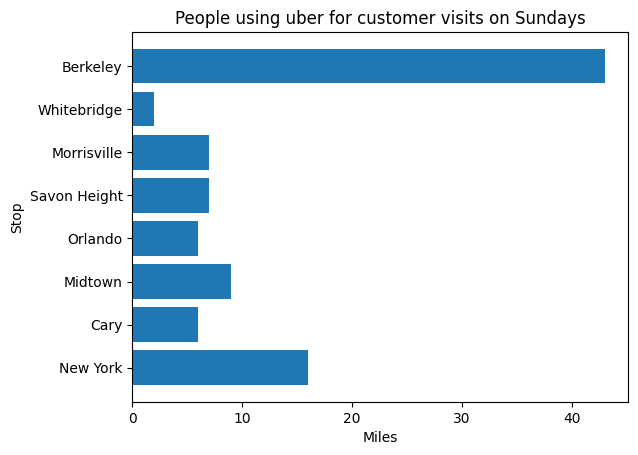

In [134]:
plt.xlabel("Miles")
plt.ylabel("Stop")
plt.barh(results3["STOP"],results3["MILES"])
plt.title("People using uber for customer visits on Sundays")
plt.show()

In [135]:
results3

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day,Request Hour,Time Slot,day_name,month
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16,Customer Visit,Sunday,12,After Noon,Sunday,January
80,2016-02-07 18:03:00,2016-02-07 18:17:00,Business,Apex,Cary,5,Customer Visit,Sunday,18,Evening,Sunday,February
256,2016-03-20 18:45:00,2016-03-20 19:06:00,Business,Briar Meadow,Midtown,9,Customer Visit,Sunday,18,Evening,Sunday,March
276,2016-03-27 15:31:00,2016-03-27 15:56:00,Business,Kissimmee,Orlando,6,Customer Visit,Sunday,15,After Noon,Sunday,March
401,2016-06-05 14:03:00,2016-06-05 14:33:00,Business,Whitebridge,Savon Height,7,Customer Visit,Sunday,14,After Noon,Sunday,June
402,2016-06-05 15:06:00,2016-06-05 15:22:00,Business,Cary,Morrisville,7,Customer Visit,Sunday,15,After Noon,Sunday,June
633,2016-08-07 17:28:00,2016-08-07 17:43:00,Business,Edgehill Farms,Whitebridge,2,Customer Visit,Sunday,17,Evening,Sunday,August
850,2016-10-23 21:10:00,2016-10-23 21:25:00,Business,Morrisville,Cary,3,Customer Visit,Sunday,21,Night,Sunday,October
913,2016-11-06 16:27:00,2016-11-06 17:28:00,Business,Santa Clara,Berkeley,43,Customer Visit,Sunday,16,Evening,Sunday,November
980,2016-11-20 11:58:00,2016-11-20 12:28:00,Business,Cary,Cary,6,Customer Visit,Sunday,11,Morning,Sunday,November


In [136]:
results_1 = result2.loc[result2["day"]=="Friday"]
results_2 = result2.loc[result2["day"]=="Monday"]
results_3 = result2.loc[result2["day"]=="Wednesday"]

**On Fridays**

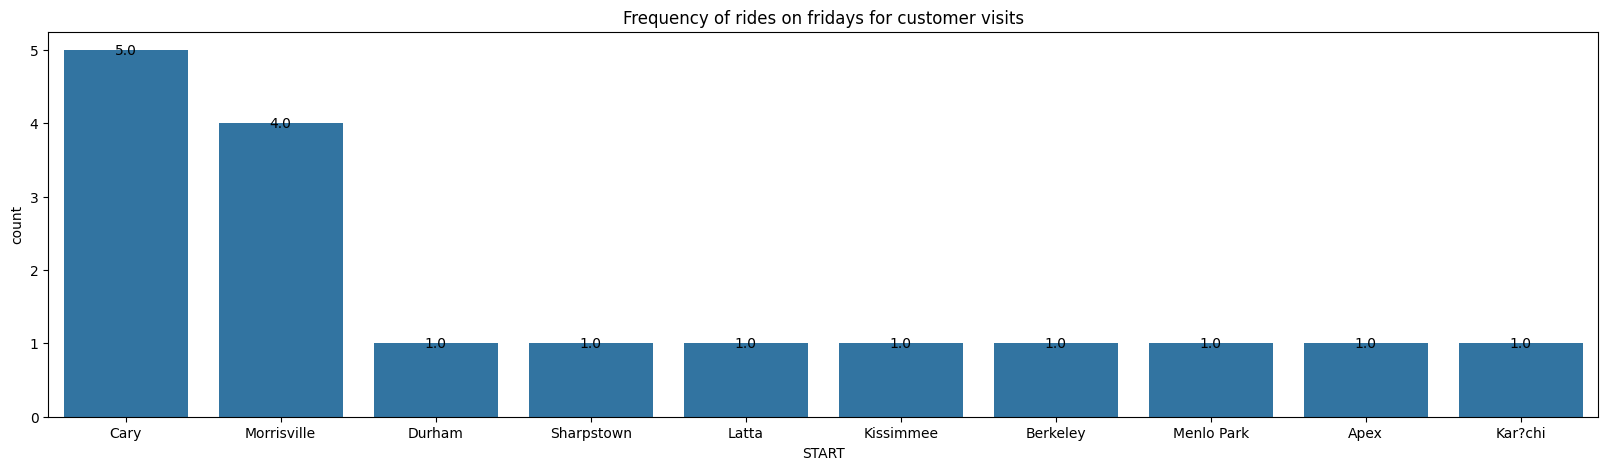

In [137]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=results_1,x="START")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.title("Frequency of rides on fridays for customer visits")
plt.show()

Pickup on Fridays was more common and is frequent from Cary and Morrisville

**On Mondays**

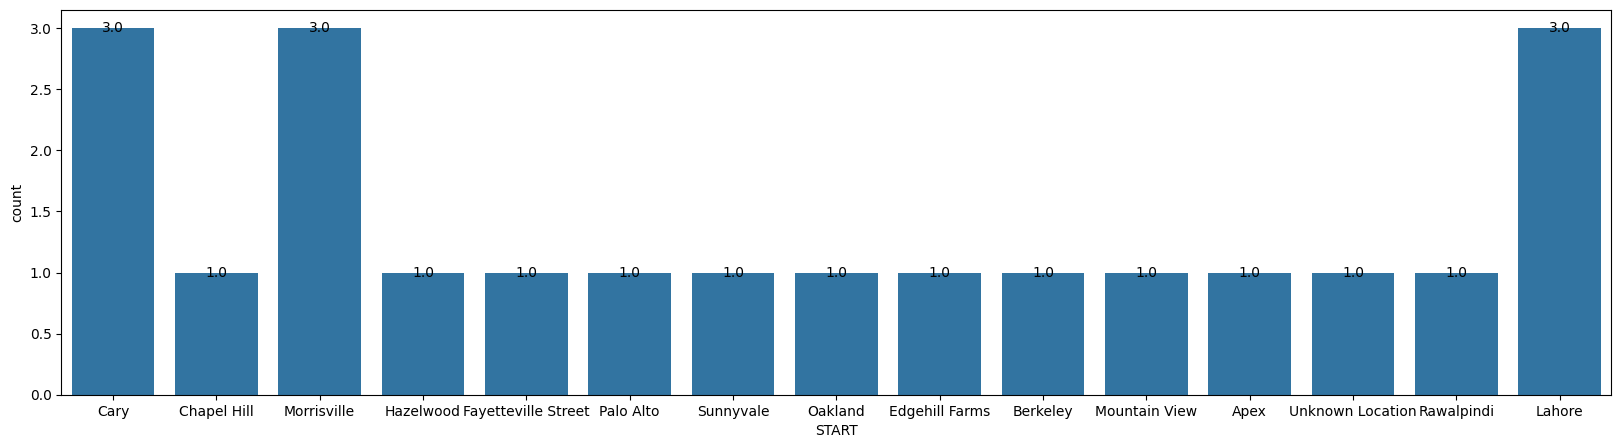

In [138]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=results_2,x="START")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

**On Wednesdays**

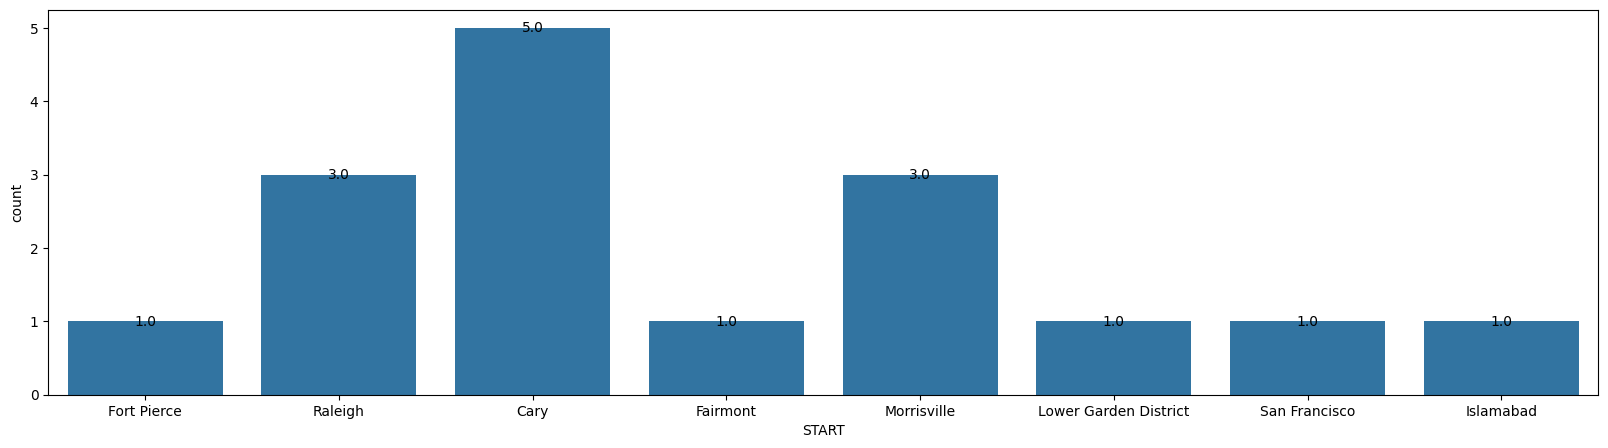

In [139]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=results_3,x="START")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

**Meetings**

In [140]:
result3 = df.loc[df["PURPOSE"]=="Meeting"]

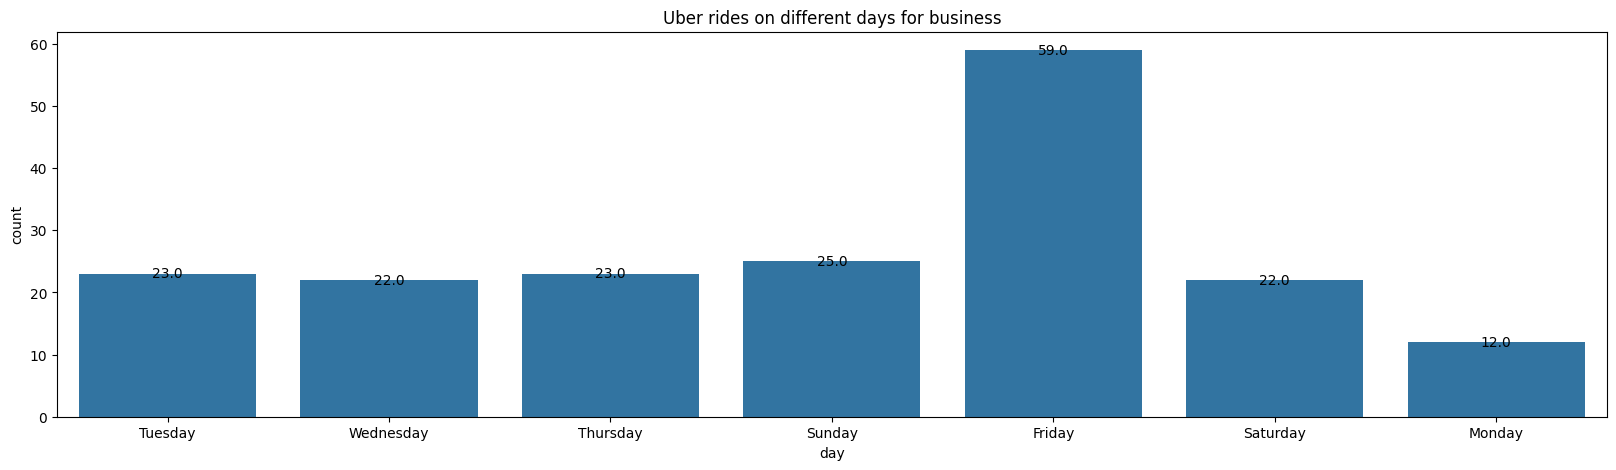

In [141]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=result3,x="day")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.title("Uber rides on different days for business")
plt.show()

Uber is used mostly on fridays to cover large Distance for Meetings.

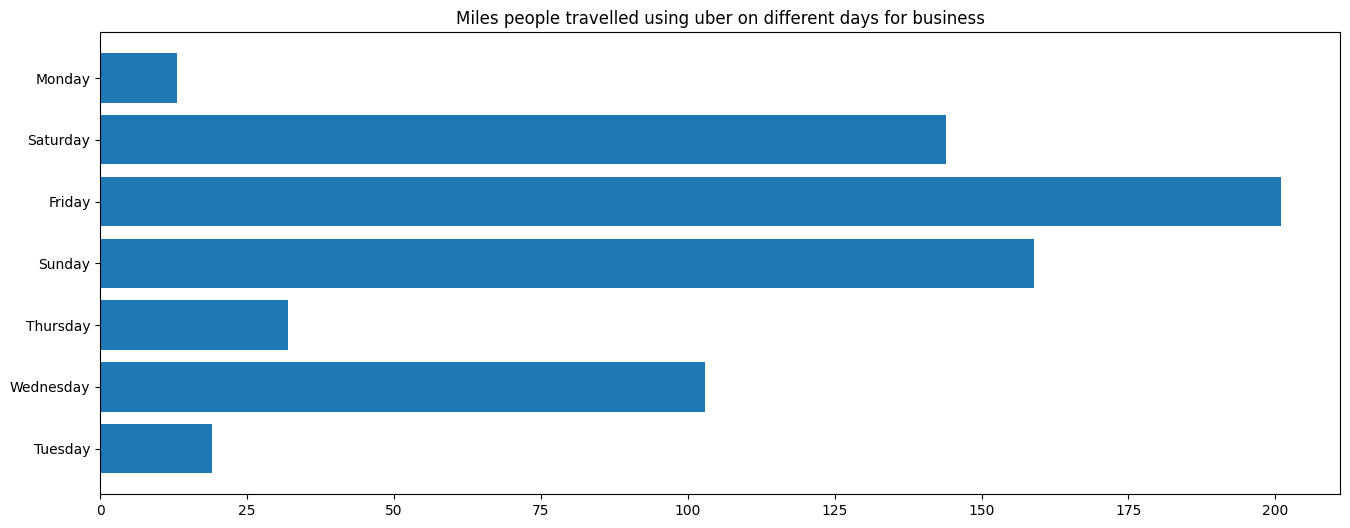

In [142]:
plt.figure(figsize=(16,6))
plt.barh(result3["day"],result3["MILES"])
plt.title("Miles people travelled using uber on different days for business")
plt.show()

In [143]:
result3.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day,Request Hour,Time Slot,day_name,month
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4,Meeting,Tuesday,17,Evening,Tuesday,January
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7,Meeting,Wednesday,17,Evening,Wednesday,January
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0,Meeting,Thursday,13,After Noon,Thursday,January
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8,Meeting,Sunday,8,Morning,Sunday,January
10,2016-01-10 15:08:00,2016-01-10 15:51:00,Business,New York,Queens,10,Meeting,Sunday,15,After Noon,Sunday,January


In [144]:
results1_ = result3.loc[result3["day"]=="Friday"]
results2_ = result3.loc[result3["day"]=="Sunday"]

In [145]:
results1_.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day,Request Hour,Time Slot,day_name,month
54,2016-01-29 10:56:00,2016-01-29 11:07:00,Business,Cary,Cary,5,Meeting,Friday,10,Morning,Friday,January
55,2016-01-29 11:43:00,2016-01-29 12:03:00,Business,Cary,Durham,10,Meeting,Friday,11,Morning,Friday,January
56,2016-01-29 13:24:00,2016-01-29 13:47:00,Business,Durham,Cary,10,Meeting,Friday,13,After Noon,Friday,January
74,2016-02-05 11:47:00,2016-02-05 12:07:00,Business,Cary,Durham,10,Meeting,Friday,11,Morning,Friday,February
75,2016-02-05 13:22:00,2016-02-05 13:41:00,Business,Durham,Cary,10,Meeting,Friday,13,After Noon,Friday,February


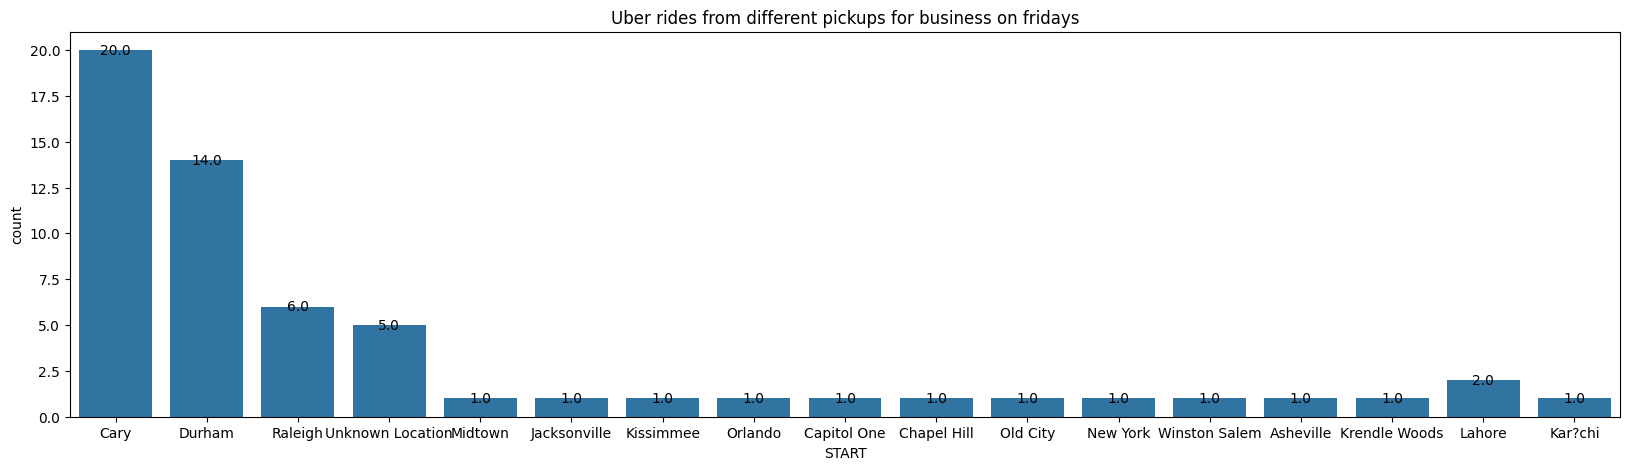

In [146]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=results1_,x="START")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.title("Uber rides from different pickups for business on fridays")
plt.show()

Rides are more from Cary Durham and Releigh

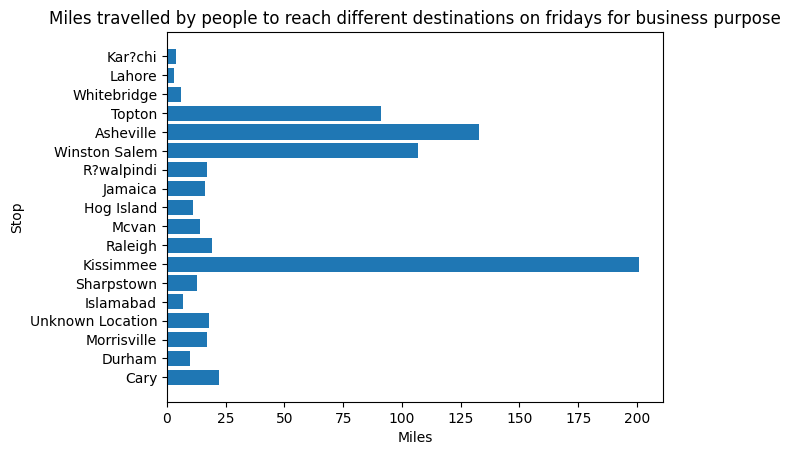

In [147]:
plt.xlabel("Miles")
plt.ylabel("Stop")
plt.barh(results1_["STOP"],results1_["MILES"])
plt.title("Miles travelled by people to reach different destinations on fridays for business purpose")
plt.show()

Uber was mostly used to visit Kissimmee, Topton and Asheville on fridays

**On Sundays For meetings**

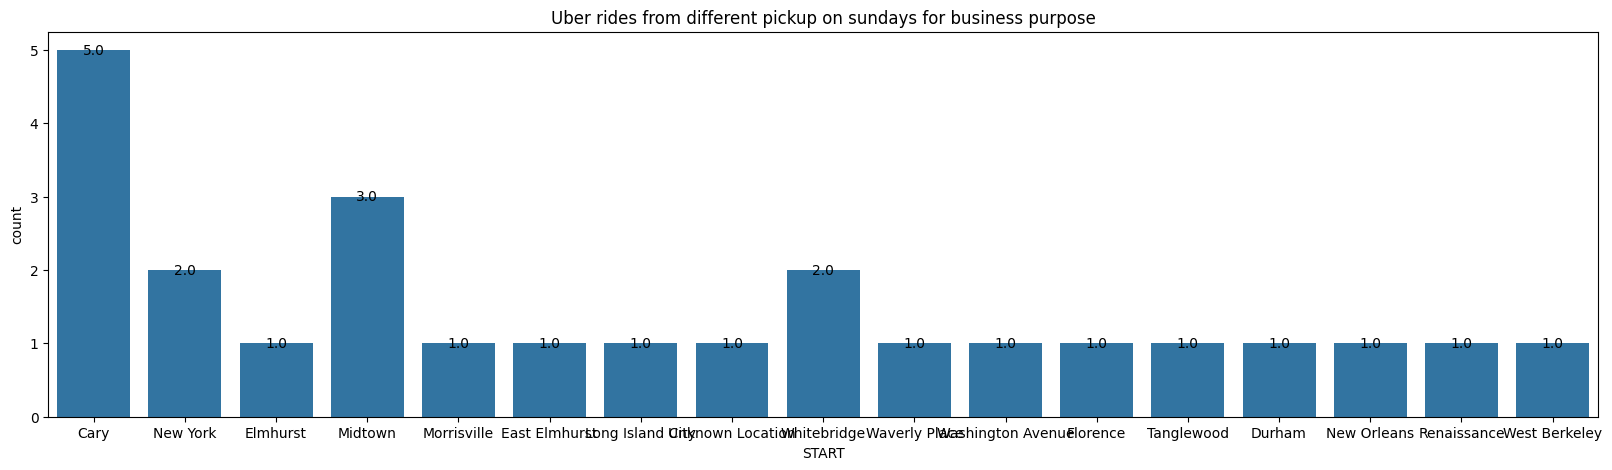

In [148]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=results2_,x="START")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.title("Uber rides from different pickup on sundays for business purpose")
plt.show()

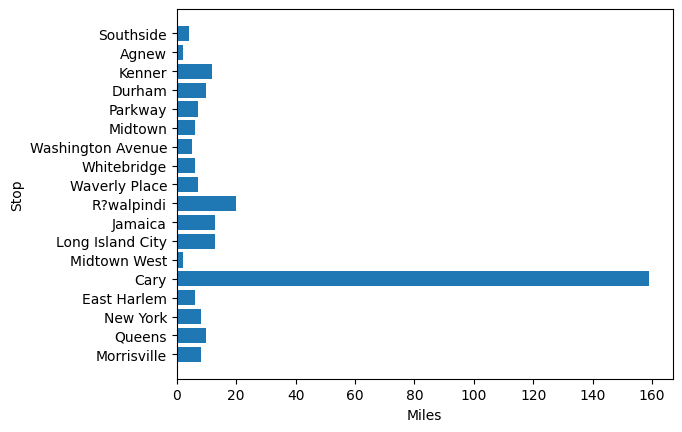

In [149]:
plt.xlabel("Miles")
plt.ylabel("Stop")
plt.barh(results2_["STOP"],results2_["MILES"])
plt.show()

Looking At what all purpose uber was used on Friday's

In [150]:
result4 = result.loc[result["day"]=="Friday"]

In [151]:
result4

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day,Request Hour,Time Slot,day_name,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5,Meal/Entertain,Friday,21,Night,Friday,January
27,2016-01-15 00:41:00,2016-01-15 01:01:00,Business,Morrisville,Cary,8,Errand/Supplies,Friday,0,Late Night,Friday,January
28,2016-01-15 11:43:00,2016-01-15 12:03:00,Business,Cary,Durham,10,Meal/Entertain,Friday,11,Morning,Friday,January
29,2016-01-15 13:26:00,2016-01-15 13:44:00,Business,Durham,Cary,10,Meal/Entertain,Friday,13,After Noon,Friday,January
53,2016-01-29 09:31:00,2016-01-29 09:45:00,Business,Cary,Cary,4,Customer Visit,Friday,9,Morning,Friday,January
...,...,...,...,...,...,...,...,...,...,...,...,...
1145,2016-12-30 10:15:00,2016-12-30 10:33:00,Business,Kar?chi,Kar?chi,2,Errand/Supplies,Friday,10,Morning,Friday,December
1146,2016-12-30 11:31:00,2016-12-30 11:56:00,Business,Kar?chi,Kar?chi,2,Errand/Supplies,Friday,11,Morning,Friday,December
1147,2016-12-30 15:41:00,2016-12-30 16:03:00,Business,Kar?chi,Kar?chi,4,Errand/Supplies,Friday,15,After Noon,Friday,December
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4,Meeting,Friday,16,Evening,Friday,December


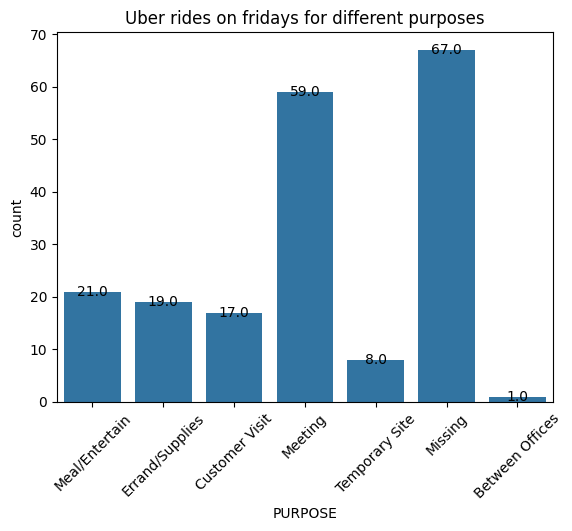

In [152]:
a = sns.countplot(data=result4,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
    plt.xticks(rotation = 45)
plt.title("Uber rides on fridays for different purposes")
plt.show()

Uber Was used More for Meeting, Meals, Errand/Supplies and Customer Visit On Fridays

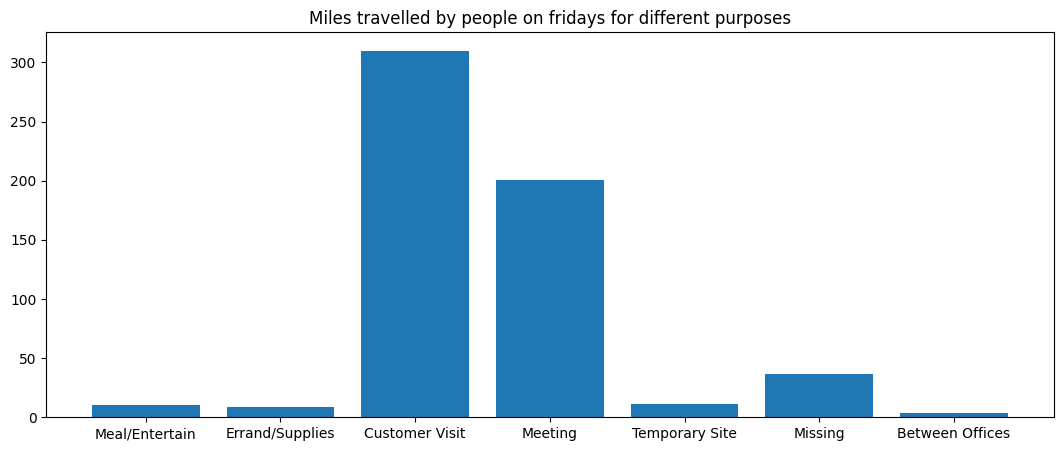

In [153]:
plt.figure(figsize=(13,5))
plt.bar(result4["PURPOSE"],result4["MILES"])
plt.title("Miles travelled by people on fridays for different purposes")
plt.show()

Uber Covered a larger distance for Customer Visit and Meetings

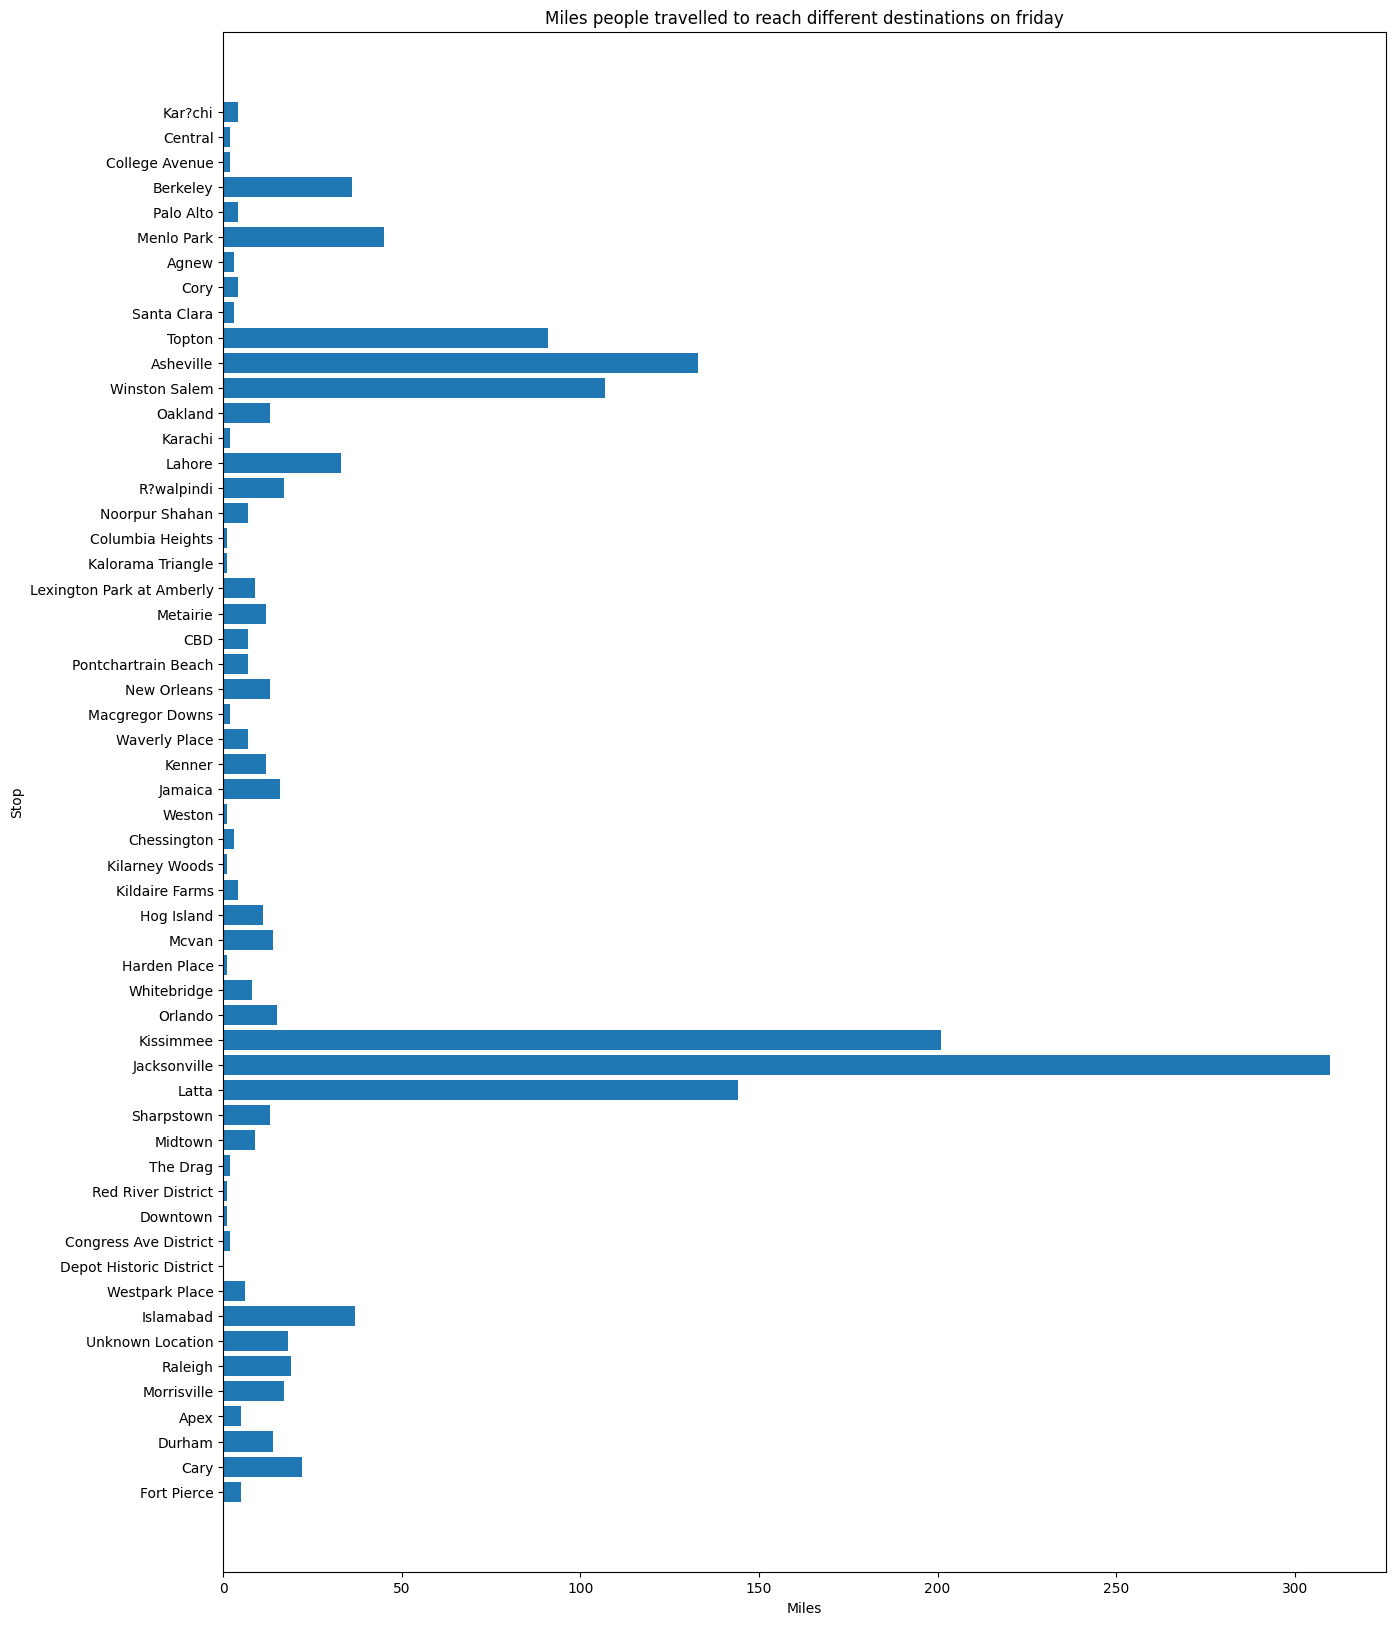

In [154]:
plt.figure(figsize=(15,20))
plt.xlabel("Miles")
plt.ylabel("Stop")
plt.barh(result4["STOP"],result4["MILES"])
plt.title("Miles people travelled to reach different destinations on friday")
plt.show()

Uber Was used for Visiting Kissimmee, Jacksonville and Asheville on Friday's

In [155]:
loc1 = result4.loc[result4["STOP"]=="Kissimmee"]
loc2 = result4.loc[result4["STOP"]=="Jacksonville"]
loc3 = result4.loc[result4["STOP"]=="Asheville"]

In [156]:
loc1.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day,Request Hour,Time Slot,day_name,month
270,2016-03-25 22:54:00,2016-03-26 01:39:00,Business,Jacksonville,Kissimmee,201,Meeting,Friday,22,Late Night,Friday,March
289,2016-04-01 13:43:00,2016-04-01 14:01:00,Business,Kissimmee,Kissimmee,11,Meeting,Friday,13,After Noon,Friday,April
291,2016-04-01 16:01:00,2016-04-01 16:49:00,Business,Orlando,Kissimmee,20,Meeting,Friday,16,Evening,Friday,April


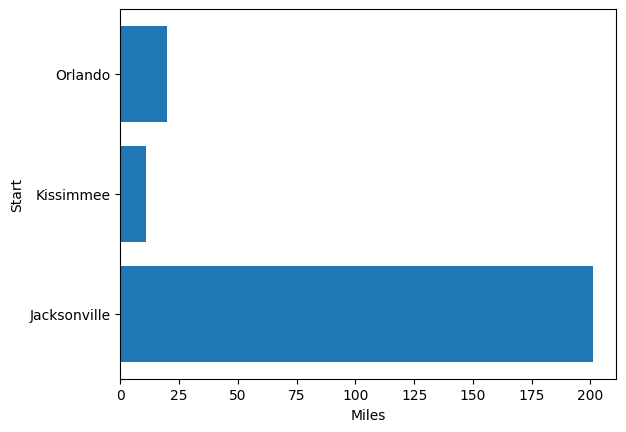

In [157]:
plt.xlabel("Miles")
plt.ylabel("Start")
plt.barh(loc1["START"],loc1["MILES"])
plt.show()

On Friday's Uber was used to travel to Kissimee from different start location as Orlando, Kissimmee And Jacksonville, where all had usecase as "Meeting"

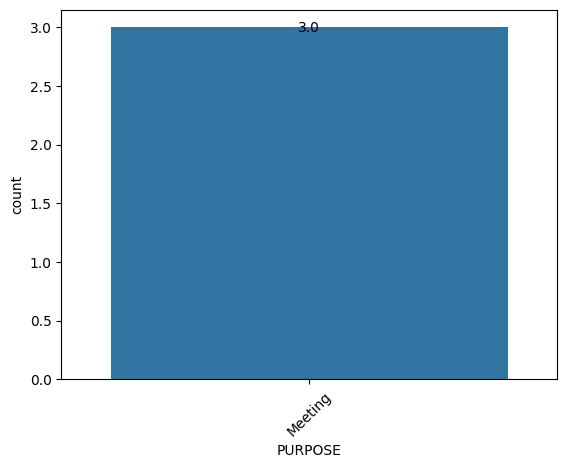

In [158]:
a = sns.countplot(data=loc1,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
    plt.xticks(rotation = 45)
plt.show()

In [159]:
loc2.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day,Request Hour,Time Slot,day_name,month
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310,Customer Visit,Friday,16,Evening,Friday,March


In [160]:
loc3.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day,Request Hour,Time Slot,day_name,month
870,2016-10-28 18:13:00,2016-10-28 20:07:00,Business,Winston Salem,Asheville,133,Meeting,Friday,18,Evening,Friday,October


# **Data analysis on sundays**

In [161]:
result5 = result.loc[result["day"]=="Sunday"]

In [162]:
result5

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day,Request Hour,Time Slot,day_name,month
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8,Meeting,Sunday,8,Morning,Sunday,January
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16,Customer Visit,Sunday,12,After Noon,Sunday,January
10,2016-01-10 15:08:00,2016-01-10 15:51:00,Business,New York,Queens,10,Meeting,Sunday,15,After Noon,Sunday,January
11,2016-01-10 18:18:00,2016-01-10 18:53:00,Business,Elmhurst,New York,7,Meeting,Sunday,18,Evening,Sunday,January
12,2016-01-10 19:12:00,2016-01-10 19:32:00,Business,Midtown,East Harlem,6,Meeting,Sunday,19,Night,Sunday,January
...,...,...,...,...,...,...,...,...,...,...,...,...
1058,2016-12-18 16:38:00,2016-12-18 17:25:00,Business,Unknown Location,Unknown Location,10,Errand/Supplies,Sunday,16,Evening,Sunday,December
1059,2016-12-18 20:35:00,2016-12-18 21:04:00,Business,Unknown Location,Unknown Location,9,Missing,Sunday,20,Night,Sunday,December
1111,2016-12-25 00:10:00,2016-12-25 00:14:00,Business,Lahore,Lahore,0,Errand/Supplies,Sunday,0,Late Night,Sunday,December
1112,2016-12-25 19:15:00,2016-12-25 19:26:00,Business,Lahore,Lahore,2,Meal/Entertain,Sunday,19,Night,Sunday,December


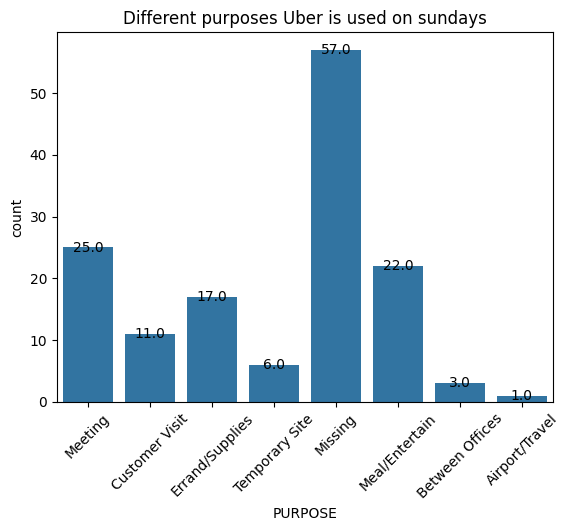

In [163]:
a = sns.countplot(data=result5,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
    plt.xticks(rotation = 45)
plt.title("Different purposes Uber is used on sundays")
plt.show()

On Sundays Uber is used for Meeting, Errand Supplies and Meal moreover

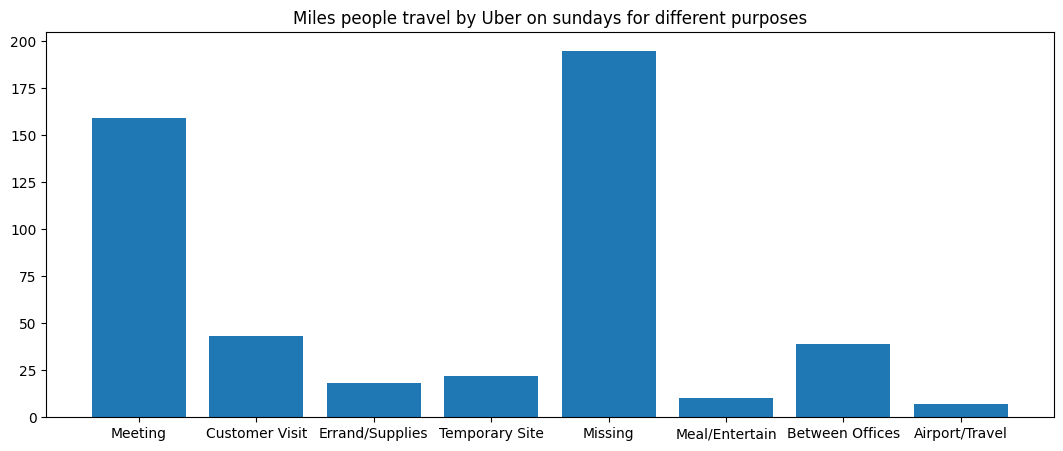

In [164]:
plt.figure(figsize=(13,5))
plt.bar(result5["PURPOSE"],result5["MILES"])
plt.title("Miles people travel by Uber on sundays for different purposes")
plt.show()

Meetings are happening at a long distance

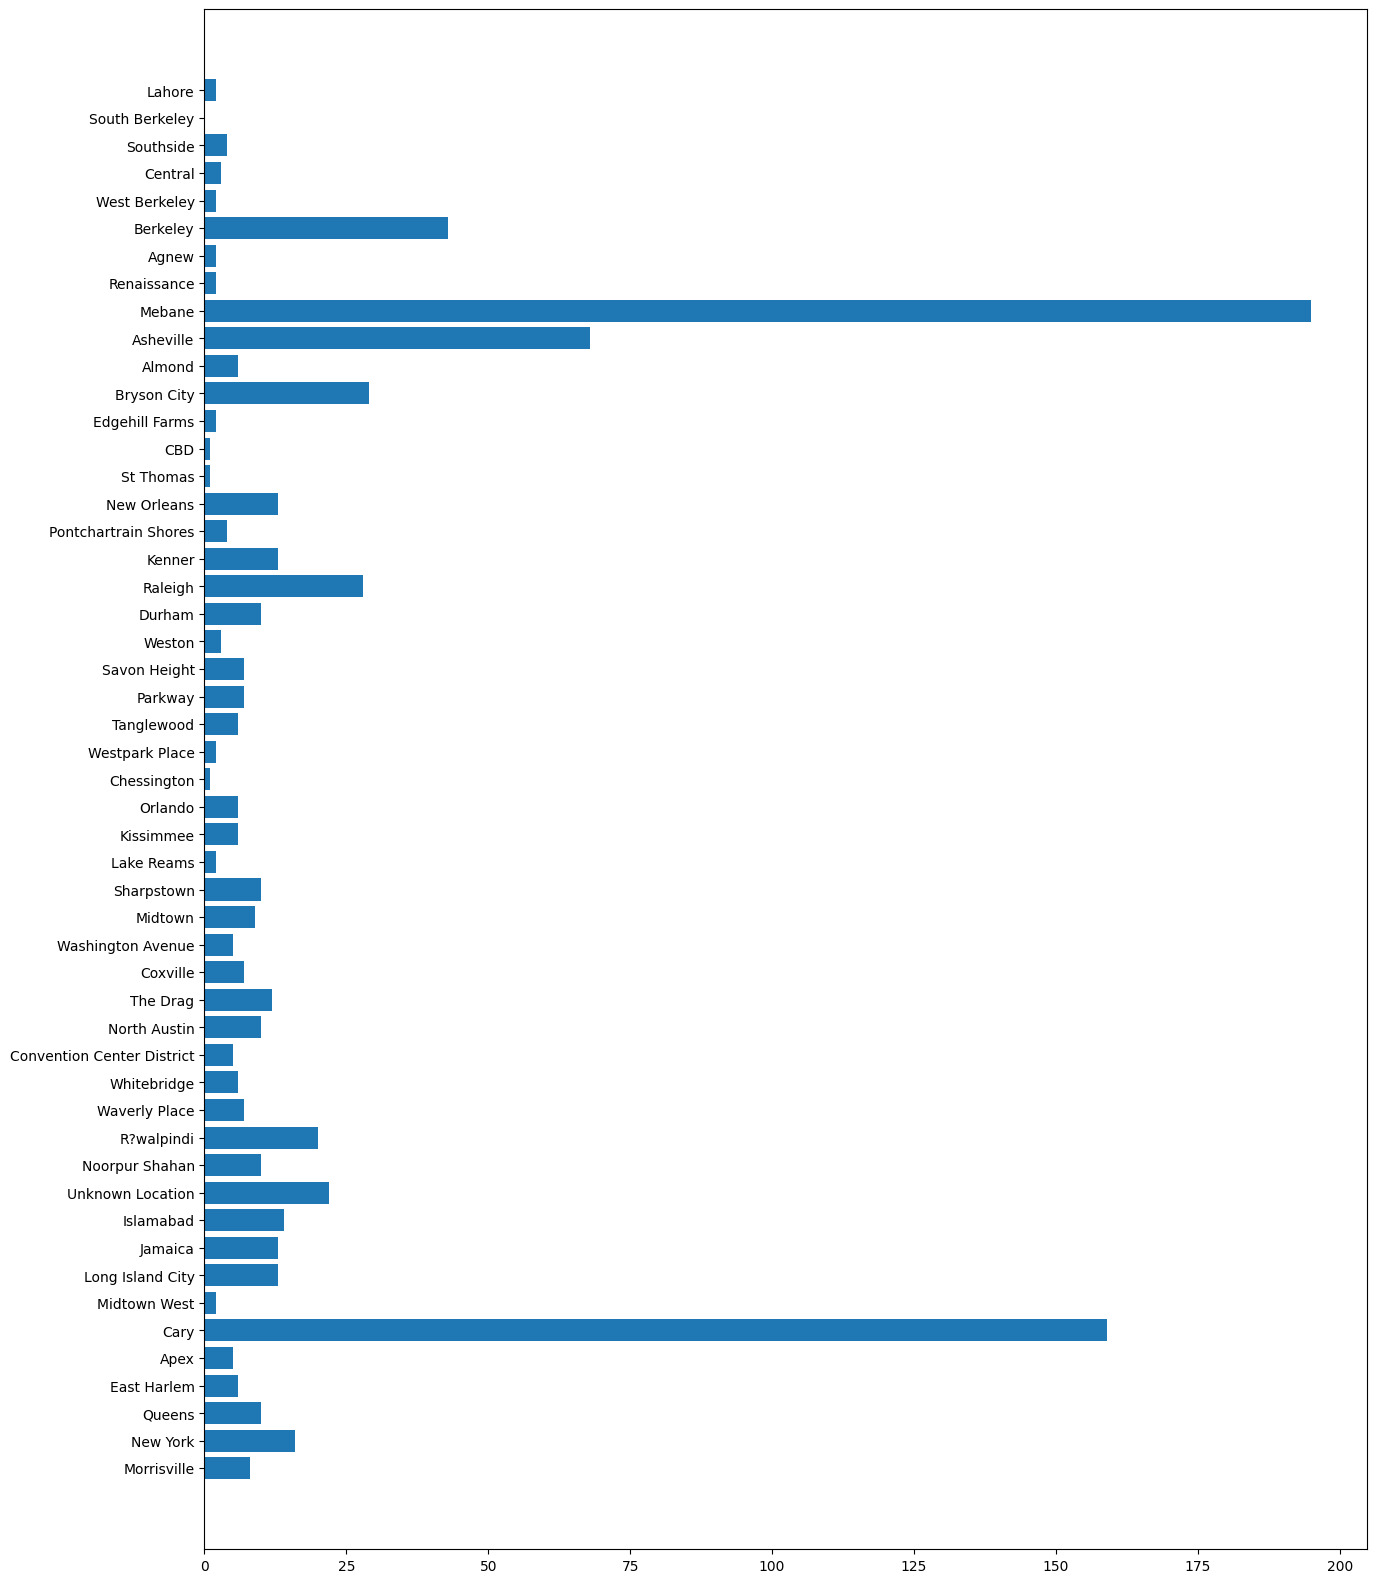

In [165]:
plt.figure(figsize=(15,20))
plt.barh(result5["STOP"],result5["MILES"])
plt.show()

In [166]:
loc1_ = result5.loc[result5["STOP"]=="Cary"]
loc2_ = result5.loc[result5["STOP"]=="Mebane"]
loc3_ = result5.loc[result5["STOP"]=="Asheville"]

In [167]:
loc1_.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day,Request Hour,Time Slot,day_name,month
80,2016-02-07 18:03:00,2016-02-07 18:17:00,Business,Apex,Cary,5,Customer Visit,Sunday,18,Evening,Sunday,February
82,2016-02-07 20:22:00,2016-02-07 20:40:00,Business,Morrisville,Cary,6,Meeting,Sunday,20,Night,Sunday,February
299,2016-04-03 02:00:00,2016-04-03 04:16:00,Business,Florence,Cary,159,Meeting,Sunday,2,Midnight,Sunday,April
331,2016-04-24 21:41:00,2016-04-24 21:50:00,Business,Morrisville,Cary,4,Between Offices,Sunday,21,Night,Sunday,April
380,2016-05-22 18:46:00,2016-05-22 18:53:00,Business,Morrisville,Cary,2,Meal/Entertain,Sunday,18,Evening,Sunday,May


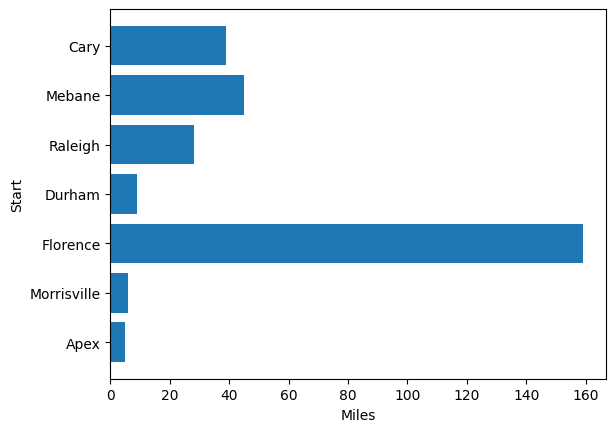

In [168]:
plt.xlabel("Miles")
plt.ylabel("Start")
plt.barh(loc1_["START"],loc1_["MILES"])
plt.show()

Uber Was Used to Travel to Cary From Florence which has longest distance out of all

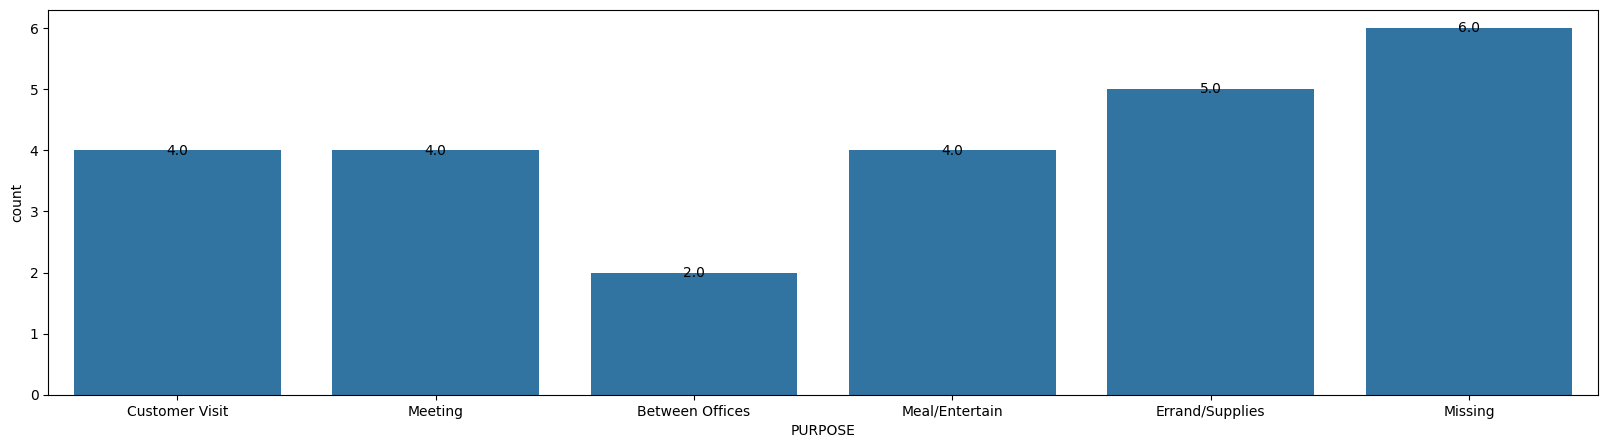

In [169]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=loc1_,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

On Sundays Uber was used for Meeting, Customer Visit and Supplies in Cary

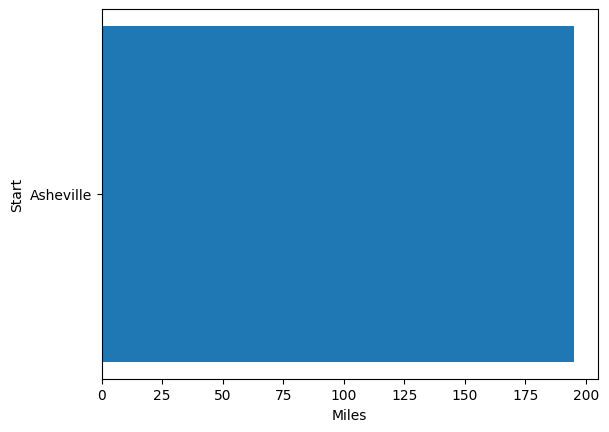

In [170]:
plt.xlabel("Miles")
plt.ylabel("Start")
plt.barh(loc2_["START"],loc2_["MILES"])
plt.show()

Mebane Was the Drop location where Asheville was the pickup location and had large distance to cover

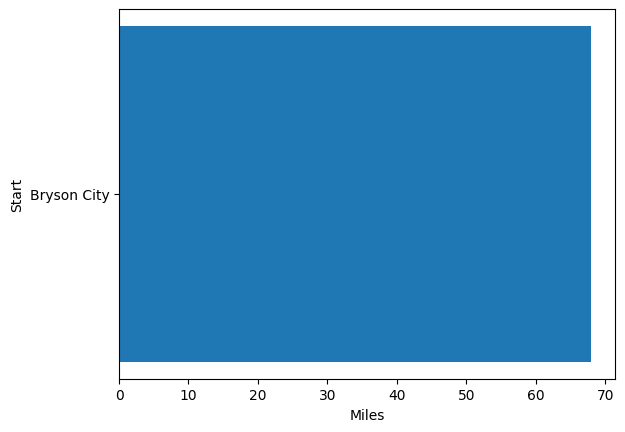

In [172]:
plt.xlabel("Miles")
plt.ylabel("Start")
plt.barh(loc3_["START"],loc3_["MILES"])
plt.show()

Asheville Was the Drop location and Bryson City was the pickup location